In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv(r'C:\Users\thari\OneDrive\Desktop\Project\clean_crime_df.csv', low_memory=False)
df.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Old_District,Neighborhood,Latitude,...,PremiseType,Total_Incidents,Year,Month,day_of_month,day_of_year,week_of_year,dayname_of_week,day_of_week,Hour
0,2023-04-15 11:30:00+00:00,LARCENY,Inside,UNKNOWN,Female,56,WHITE,NORTHERN,HARWOOD,39.318181,...,STREET,1,2023,4,15,105,15,Saturday,5,11
1,2023-04-15 21:50:00+00:00,LARCENY,Inside,UNKNOWN,UNKNOWN,38,UNKNOWN,NORTHEAST,PULASKI INDUSTRIAL AREA,39.310944,...,GAS STATION,1,2023,4,15,105,15,Saturday,5,21
2,2023-04-15 17:00:00+00:00,LARCENY FROM AUTO,Inside,UNKNOWN,Male,56,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,MOUNT HOLLY,39.313038,...,STREET,1,2023,4,15,105,15,Saturday,5,17
3,2023-04-15 21:15:00+00:00,ROBBERY,Inside,HANDGUN,Male,54,WHITE,NORTHWEST,CENTRAL PARK HEIGHTS,39.337523,...,STREET,1,2023,4,15,105,15,Saturday,5,21
4,2023-04-11 09:25:00+00:00,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,Male,58,WHITE,WESTERN,MOSHER,39.296418,...,DRUG STORE / MED BL,1,2023,4,11,101,15,Tuesday,1,9


In [5]:
df.isnull().sum()

CrimeDateTime      0
Description        0
Inside_Outside     0
Weapon             0
Gender             0
Age                0
Race               0
Old_District       0
Neighborhood       0
Latitude           0
Longitude          0
PremiseType        0
Total_Incidents    0
Year               0
Month              0
day_of_month       0
day_of_year        0
week_of_year       0
dayname_of_week    0
day_of_week        0
Hour               0
dtype: int64

In [6]:
df['new_desc'] = df['Description']

In [7]:
df.loc[df['new_desc'].isin(['ROBBERY - COMMERCIAL', 'ROBBERY - CARJACKING' ]), 'new_desc'] = 'ROBBERY'
df.loc[df['new_desc'].isin(['LARCENY FROM AUTO']), 'new_desc'] = 'LARCENY'
df.loc[df['new_desc'].isin(['COMMON ASSAULT', 'AGG. ASSAULT']), 'new_desc'] = 'ASSUALT'

In [8]:
df.new_desc.value_counts()

new_desc
LARCENY       151225
ASSUALT       134587
BURGLARY       59699
AUTO THEFT     47542
ROBBERY        46648
SHOOTING        6603
HOMICIDE        3373
RAPE            2729
ARSON           1887
Name: count, dtype: int64

In [9]:
def crime_category(crime):
    if crime in ['ASSUALT', 'SHOOTING', 'RAPE', 'HOMICIDE']:
        return 1
    else:
        return 0


df['violent_crime'] = df['new_desc'].apply(crime_category)
df['violent_crime']=df['violent_crime'].astype(int)
df.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Old_District,Neighborhood,Latitude,...,Year,Month,day_of_month,day_of_year,week_of_year,dayname_of_week,day_of_week,Hour,new_desc,violent_crime
0,2023-04-15 11:30:00+00:00,LARCENY,Inside,UNKNOWN,Female,56,WHITE,NORTHERN,HARWOOD,39.318181,...,2023,4,15,105,15,Saturday,5,11,LARCENY,0
1,2023-04-15 21:50:00+00:00,LARCENY,Inside,UNKNOWN,UNKNOWN,38,UNKNOWN,NORTHEAST,PULASKI INDUSTRIAL AREA,39.310944,...,2023,4,15,105,15,Saturday,5,21,LARCENY,0
2,2023-04-15 17:00:00+00:00,LARCENY FROM AUTO,Inside,UNKNOWN,Male,56,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,MOUNT HOLLY,39.313038,...,2023,4,15,105,15,Saturday,5,17,LARCENY,0
3,2023-04-15 21:15:00+00:00,ROBBERY,Inside,HANDGUN,Male,54,WHITE,NORTHWEST,CENTRAL PARK HEIGHTS,39.337523,...,2023,4,15,105,15,Saturday,5,21,ROBBERY,0
4,2023-04-11 09:25:00+00:00,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,Male,58,WHITE,WESTERN,MOSHER,39.296418,...,2023,4,11,101,15,Tuesday,1,9,ASSUALT,1


In [10]:
def crime_category(crime):
    if crime in ['LARCENY', 'BURGLARY', 'ROBBERY','AUTO THEFT', 'ARSON']:
        return 1
    else:
        return 0


df['property_crime'] = df['new_desc'].apply(crime_category)
df['property_crime']=df['property_crime'].astype(int)
df.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Old_District,Neighborhood,Latitude,...,Month,day_of_month,day_of_year,week_of_year,dayname_of_week,day_of_week,Hour,new_desc,violent_crime,property_crime
0,2023-04-15 11:30:00+00:00,LARCENY,Inside,UNKNOWN,Female,56,WHITE,NORTHERN,HARWOOD,39.318181,...,4,15,105,15,Saturday,5,11,LARCENY,0,1
1,2023-04-15 21:50:00+00:00,LARCENY,Inside,UNKNOWN,UNKNOWN,38,UNKNOWN,NORTHEAST,PULASKI INDUSTRIAL AREA,39.310944,...,4,15,105,15,Saturday,5,21,LARCENY,0,1
2,2023-04-15 17:00:00+00:00,LARCENY FROM AUTO,Inside,UNKNOWN,Male,56,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,MOUNT HOLLY,39.313038,...,4,15,105,15,Saturday,5,17,LARCENY,0,1
3,2023-04-15 21:15:00+00:00,ROBBERY,Inside,HANDGUN,Male,54,WHITE,NORTHWEST,CENTRAL PARK HEIGHTS,39.337523,...,4,15,105,15,Saturday,5,21,ROBBERY,0,1
4,2023-04-11 09:25:00+00:00,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,Male,58,WHITE,WESTERN,MOSHER,39.296418,...,4,11,101,15,Tuesday,1,9,ASSUALT,1,0


In [11]:
df.columns

Index(['CrimeDateTime', 'Description', 'Inside_Outside', 'Weapon', 'Gender',
       'Age', 'Race', 'Old_District', 'Neighborhood', 'Latitude', 'Longitude',
       'PremiseType', 'Total_Incidents', 'Year', 'Month', 'day_of_month',
       'day_of_year', 'week_of_year', 'dayname_of_week', 'day_of_week', 'Hour',
       'new_desc', 'violent_crime', 'property_crime'],
      dtype='object')

In [12]:
#df['Age'] = df['Age'].round().astype(int)

In [13]:
df.Age.head()

0    56
1    38
2    56
3    54
4    58
Name: Age, dtype: int64

In [14]:
df1=df[['Latitude', 'Longitude','Year', 'Month', 'day_of_month',
       'day_of_year', 'week_of_year', 'day_of_week', 'Hour', 'Age',
        'violent_crime', 'property_crime']]

In [15]:
df1.head()

,Latitude,Longitude,Year,Month,day_of_month,day_of_year,week_of_year,day_of_week,Hour,Age,violent_crime,property_crime
0,39.318181,-76.609534,2023,4,15,105,15,5,11,56,0,1
1,39.310944,-76.530961,2023,4,15,105,15,5,21,38,0,1
2,39.313038,-76.674519,2023,4,15,105,15,5,17,56,0,1
3,39.337523,-76.664090,2023,4,15,105,15,5,21,54,0,1
4,39.296418,-76.661570,2023,4,11,101,15,1,9,58,1,0


In [16]:
df1.columns

Index(['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age', 'violent_crime',
       'property_crime'],
      dtype='object')

In [21]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df1[['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age']] # Features
y = df1[['violent_crime', 'property_crime']]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = rfc.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7356343345183196

In [19]:
om=rfc.feature_importances_
indices = np.argsort(om)

In [20]:
features=df1.columns

In [21]:
features

Index(['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age', 'violent_crime',
       'property_crime'],
      dtype='object')

In [22]:
om

array([0.16139182, 0.16214238, 0.05602135, 0.02948445, 0.09132567,
       0.10087878, 0.06265962, 0.05246309, 0.08987816, 0.19375468])

Text(0.5, 0, 'Relative Importance')

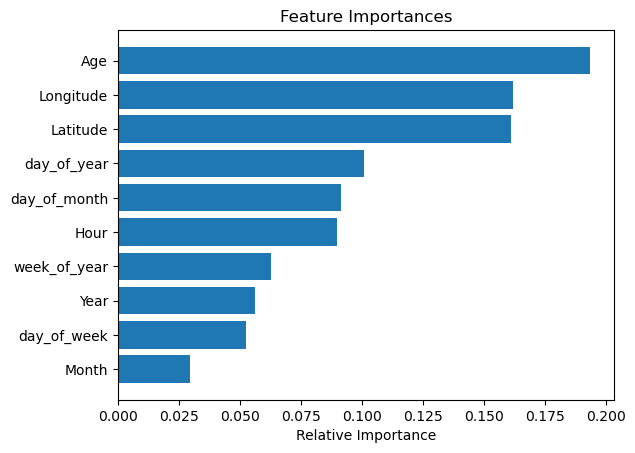

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [23]:
import pickle
pickle_out=open("rfc.pkl","wb")
pickle.dump(rfc,pickle_out)
pickle_out.close()

In [24]:
from sklearn import tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

X = df1[['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age']] # Features
y = df1[['violent_crime', 'property_crime']]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
classifier=DecisionTreeClassifier()

In [27]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
#plt.figure(figsize=(15,10))
#tree.plot_tree(classifier,filled=True)

In [29]:
y_pred=classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6603968786801527

In [31]:
om=classifier.feature_importances_
indices = np.argsort(om)

In [32]:
features=df1.columns

In [33]:
features

Index(['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age', 'violent_crime',
       'property_crime'],
      dtype='object')

Text(0.5, 0, 'Relative Importance')

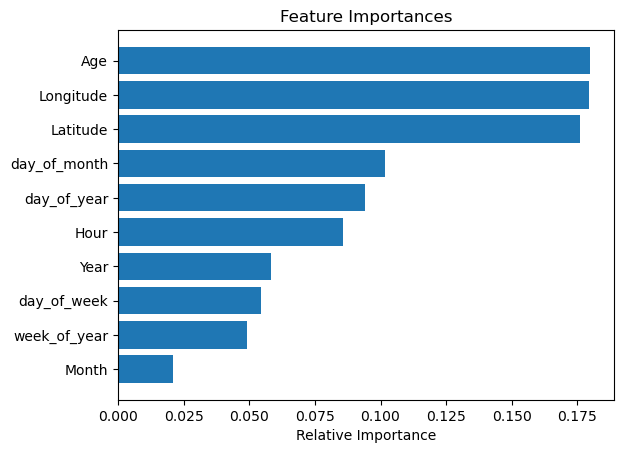

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [35]:
import pickle
pickle_out=open("rfc.pkl","wb")
pickle.dump(rfc,pickle_out)
pickle_out.close()

Logistic regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [17]:
X1 = df1[['Latitude', 'Longitude', 'Year', 'Month', 'day_of_month', 'day_of_year',
       'week_of_year', 'day_of_week', 'Hour', 'Age']] # Features
y1 = df1[['violent_crime', 'property_crime']]  # Target variable
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [19]:
lr = LogisticRegression()
lr.fit(X1_train, y1_train)

ValueError: y should be a 1d array, got an array of shape (363434, 2) instead.

In [55]:
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier

# Assuming your trained model is stored in 'model'

# Load the user input
lat = float(input("Enter latitude: "))
long = float(input("Enter longitude: "))
date_str = input("Enter date (MM/DD/YYYY): ")
time_str = input("Enter time (HH:MM): ")
age = int(input("Enter age: "))

# Convert date and time strings to datetime objects
date = datetime.strptime(date_str, '%m/%d/%Y')
time = datetime.strptime(time_str, '%H:%M')

# Prepare input data
input_data = {
    'Latitude': [lat],
    'Longitude': [long],
    'Year': [date.year],
    'Month': [date.month],
    'day_of_month': [date.day],
    'day_of_year': [date.timetuple().tm_yday],
    'week_of_year': [date.isocalendar()[1]],
    'day_of_week': [date.weekday()],
    'Hour': [time.hour],
    'Age': [age]  # Assuming this is a constant value based on your example
}

Enter latitude: 39.313038
Enter longitude: -76.674519
Enter date (MM/DD/YYYY): 10/9/2024
Enter time (HH:MM): 02:56
Enter age: 75


In [56]:
# Create DataFrame from input data
input_df = pd.DataFrame(input_data)

In [57]:

# Make predictions
predicted_probabilities = rfc.predict_proba(input_df)

In [58]:

# Assuming the classes are ['violent_crime', 'property_crime']
crime_types = ['violent_crime', 'property_crime']

# Display results
for crime_type, probability in zip(crime_types, predicted_probabilities[0]):
    print(f"Probability of {crime_type}: {probability}")

Probability of violent_crime: [0.71 0.29]
